In [26]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [27]:
df = pd.read_csv('Fake News Data.csv')
df.head()

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  72134 non-null  int64 
 1   title       71576 non-null  object
 2   text        72095 non-null  object
 3   label       72134 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 2.2+ MB


In [29]:
df['label'].value_counts()

1    37106
0    35028
Name: label, dtype: int64

<Axes: >

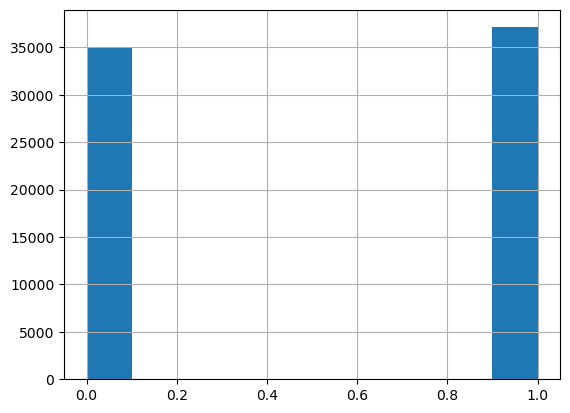

In [30]:
df['label'].hist()

In [31]:
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,NaN,Did they post their votes for Hillary already?,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [32]:
df.isnull().sum()

title    558
text      39
label      0
dtype: int64

In [33]:
df = df.dropna()

In [34]:
df_fake = df[df['label']==0]
df_fake.head()

,title,text,label
3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
11,"May Brexit offer would hurt, cost EU citizens ...",BRUSSELS (Reuters) - British Prime Minister Th...,0
12,Schumer calls on Trump to appoint official to ...,"WASHINGTON (Reuters) - Charles Schumer, the to...",0
14,No Change Expected for ESPN Political Agenda D...,As more and more sports fans turn off ESPN to ...,0
15,Billionaire Odebrecht in Brazil scandal releas...,RIO DE JANEIRO/SAO PAULO (Reuters) - Billionai...,0


In [35]:
df_real = df[df['label']==1]
df_real.head()

,title,text,label
0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
5,About Time! Christian Group Sues Amazon and SP...,All we can say on this one is it s about time ...,1
6,DR BEN CARSON TARGETED BY THE IRS: “I never ha...,DR. BEN CARSON TELLS THE STORY OF WHAT HAPPENE...,1


## TF-IDF Vectorizer for Real News

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents = df_real['text']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, max_features=10000)

tfidf_matrix = vectorizer.fit_transform(documents)

print(vectorizer)

feature_names = vectorizer.get_feature_names_out()

sums = tfidf_matrix.sum(axis=0)

data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0,col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking = ranking.sort_values('rank', ascending=False)

top_n = 1000
top_n_terms = ranking.head(top_n)
print(top_n_terms)

TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english')
           term         rank
9249      trump  2130.913575
1748    clinton  1020.787146
4272    hillary   799.456408
6913  president   777.136278
6551     people   777.043917
...         ...          ...
2600    details    71.823691
7650     return    71.810624
9033    threats    71.793888
7461  relations    71.740590
8431     spicer    71.619735

[1000 rows x 2 columns]


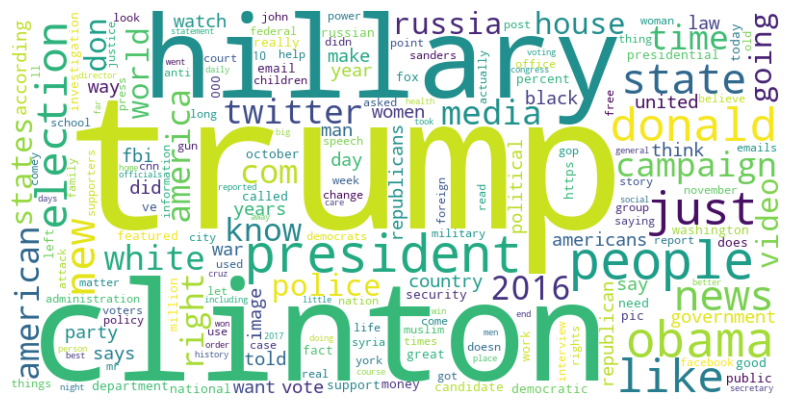

In [37]:
from wordcloud import WordCloud

word_scores = {word: tfidf_matrix.getcol(idx).sum() for word, idx in vectorizer.vocabulary_.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## TF-IDF Vectorizer for Fake News

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents = df_fake['text']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, max_features=10000)

tfidf_matrix = vectorizer.fit_transform(documents)

print(vectorizer)

feature_names = vectorizer.get_feature_names_out()

sums = tfidf_matrix.sum(axis=0)

data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0,col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking = ranking.sort_values('rank', ascending=False)

top_n = 1000
top_n_terms = ranking.head(top_n)
print(top_n_terms)

TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english')
             term         rank
9325        trump  1818.312757
5927           mr  1048.030839
8570        state   687.919725
1803      clinton   660.575101
4426        house   653.124215
...           ...          ...
232      abortion    74.757402
6977     probably    74.745319
6762  politicians    74.626300
975        bannon    74.620208
4895          jan    74.602848

[1000 rows x 2 columns]


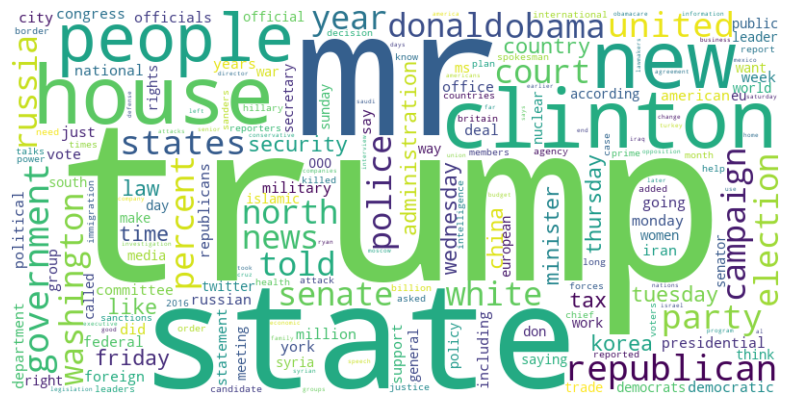

In [39]:
from wordcloud import WordCloud

word_scores = {word: tfidf_matrix.getcol(idx).sum() for word, idx in vectorizer.vocabulary_.items()}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_scores)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## TF-IDF Vectorizer on the entire dataset - text

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents = df['text']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, max_features=10000)

tfidf_matrix = vectorizer.fit_transform(documents)

print(vectorizer)

feature_names = vectorizer.get_feature_names_out()

sums = tfidf_matrix.sum(axis=0)

data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0,col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking = ranking.sort_values('rank', ascending=False)

top_n = 1000
top_n_terms = ranking.head(top_n)
print(top_n_terms)

TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english')
            term         rank
9302       trump  3923.065358
1763     clinton  1708.514191
6906   president  1636.469624
6548      people  1407.261985
5931          mr  1325.199087
...          ...          ...
7600   residents   146.793765
3426   expressed   146.738468
2287   criticism   146.588923
93          2008   146.471364
2030  considered   146.434323

[1000 rows x 2 columns]


## TF-IDF Vectorizer on the entire dataset - title

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

documents = df['title']

vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=2, max_features=10000)

tfidf_matrix = vectorizer.fit_transform(documents)

print(vectorizer)

feature_names = vectorizer.get_feature_names_out()

sums = tfidf_matrix.sum(axis=0)

data = []
for col, term in enumerate(feature_names):
    data.append((term, sums[0,col]))

ranking = pd.DataFrame(data, columns=['term','rank'])
ranking = ranking.sort_values('rank', ascending=False)

top_n = 1000
top_n_terms = ranking.head(top_n)
print(top_n_terms)

TfidfVectorizer(max_df=0.5, max_features=10000, min_df=2, stop_words='english')
         term         rank
9248    trump  2442.827631
6008      new  1546.193740
9559    video  1321.799422
9953     york  1245.278042
9059    times  1234.238187
...       ...          ...
7167     rant    42.315635
533    anthem    42.282802
8882  targets    42.277994
6862    prime    42.240302
2951  eastern    42.177136

[1000 rows x 2 columns]


In [42]:
import numpy as np

glove_vectors = {}
with open('glove.6B.100d.txt', 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], dtype='float32')
        glove_vectors[word] = vector

In [43]:
original_feature_names = top_n_terms.term

word_vectors = []
filtered_feature_names = []

for word in original_feature_names:
    if word in glove_vectors:
        word_vectors.append(glove_vectors[word])
        filtered_feature_names.append(word)

word_vectors = np.array(word_vectors)

## Dimensionality Reduction - UMAP

In [44]:
import umap

In [45]:
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.05, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(word_vectors)


/Users/punamichowdary/anaconda3/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


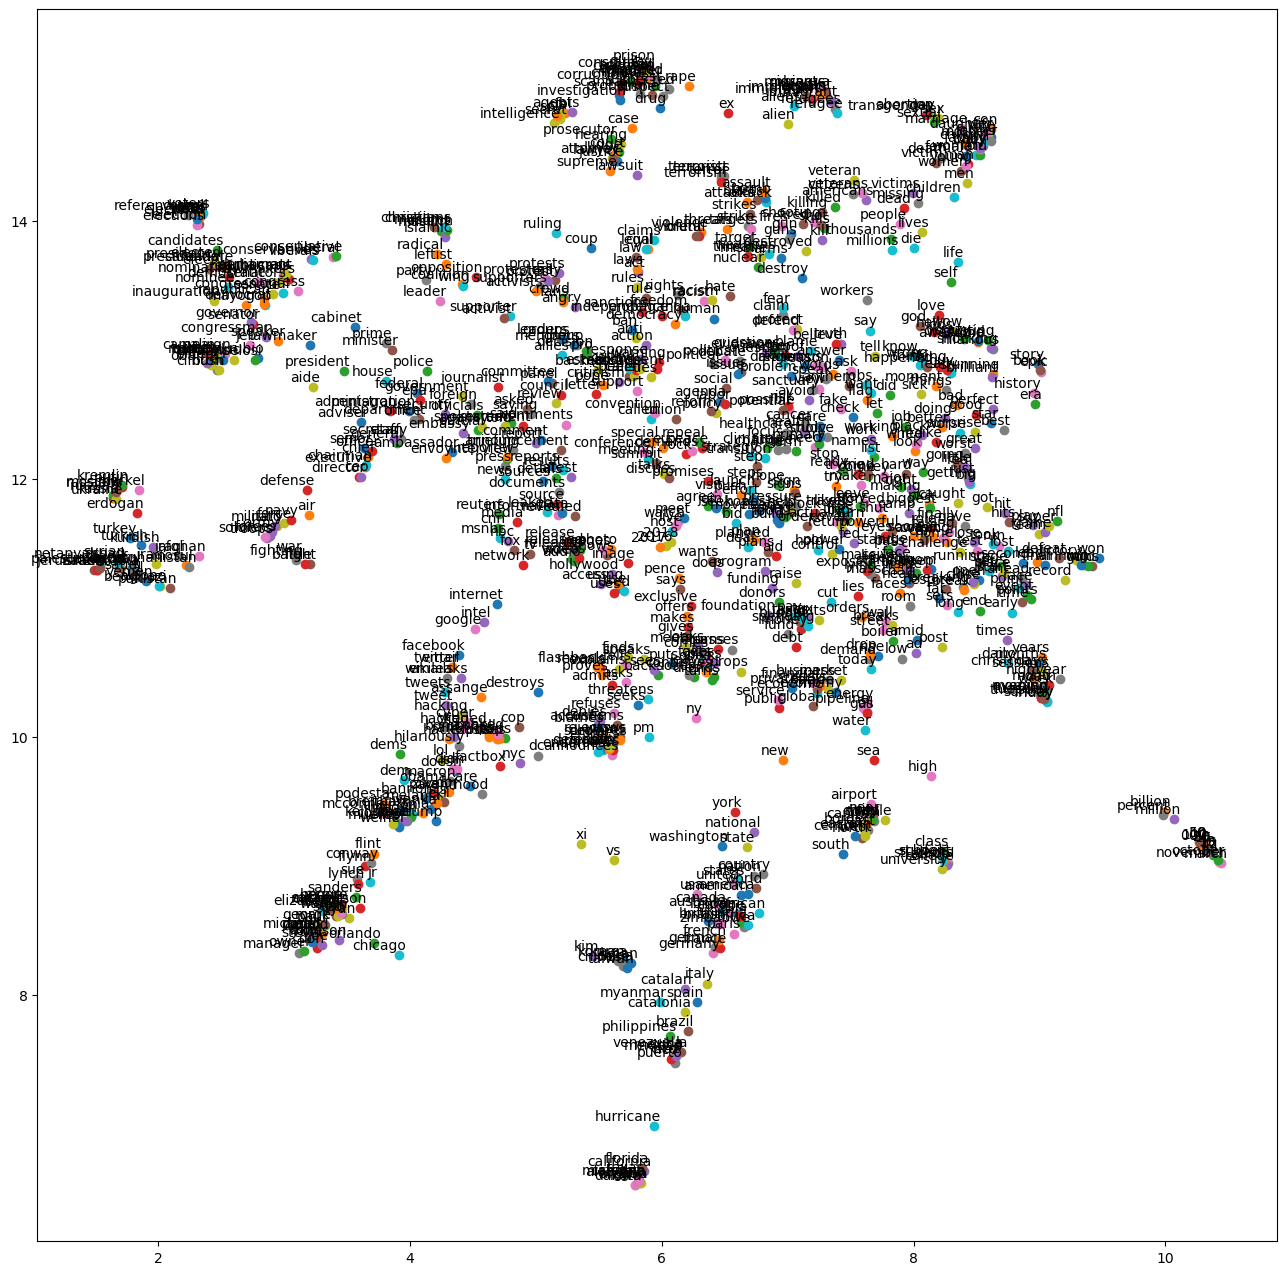

In [46]:
plt.figure(figsize=(16, 16))
for i, word in enumerate(filtered_feature_names):
    if word in glove_vectors:  # Only plot words that were in the GloVe vectors
        plt.scatter(X_umap[i, 0], X_umap[i, 1])
        plt.annotate(word, xy=(X_umap[i, 0], X_umap[i, 1]), xytext=(5, 2),
                     textcoords='offset points', ha='right', va='bottom')
plt.show()

## LSTM

In [47]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.layers import Embedding
from keras.preprocessing import sequence

# length that all document sequences will be padded to
max_document_length = 1000  

X = sequence.pad_sequences(tfidf_matrix.toarray(), maxlen=max_document_length)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df['label'], test_size=0.2, random_state=42)


model = Sequential()
model.add(Embedding(input_dim=top_n, output_dim=64, input_length=max_document_length))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 64)          64000     
                                                                 
 lstm (LSTM)                 (None, 100)               66000     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 130101 (508.21 KB)
Trainable params: 130101 (508.21 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
model.fit(X_train, y_train, validation_split=0.2, epochs=3, batch_size=514)
# decrease batch size

Epoch 1/3
 1/90 [..............................] - ETA: 15:38 - loss: 0.6931 - accuracy: 0.5117

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)

In [ ]:
print(f"Accuracy: {scores[1]*100:.2f}%")

In [ ]:
probabilities = model.predict(X_test)
# converting probabilities to binary labels based on 0.5 threshold
predictions = (probabilities > 0.5).astype(int)

In [ ]:
report = classification_report(y_test, predictions)
print(report)

# BERT Embeddings


In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import DistilBertTokenizer, DistilBertModel
import tensorflow as tf
from tensorflow.keras import activations, optimizers, losses

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model =  DistilBertModel.from_pretrained('distilbert-base-uncased')

In [ ]:
def bert_encode(texts, tokenizer, model, max_len=128, batch_size=256, truncation=True):
    model.eval()  
    features = []
    
    # splitting in batches
    for i in tqdm(range(0, len(texts), batch_size)):
        batch_texts = texts[i:i+batch_size]
        input_ids = []
        attention_masks = []
        
        for text in batch_texts:
            encoded_text = tokenizer.encode_plus(
                text,
                max_length=max_len,
                add_special_tokens=True,
                return_token_type_ids=False,
                pad_to_max_length=True,
                return_attention_mask=True,
                return_tensors='pt',  
            )
            input_ids.append(encoded_text['input_ids'])
            attention_masks.append(encoded_text['attention_mask'])
        
        input_ids = torch.cat(input_ids, dim=0)
        attention_masks = torch.cat(attention_masks, dim=0)
        
        with torch.no_grad():
            batch_features = model(input_ids, attention_mask=attention_masks)
        
        features.append(batch_features.last_hidden_state[:, 0, :].cpu().numpy())
    
    features = np.concatenate(features, axis=0)
    return features

In [ ]:
texts = df['title'].values  
labels = df['label'].values

In [23]:
from tqdm.auto import tqdm

features = bert_encode(texts, tokenizer, model)

  0%|          | 0/280 [00:00<?, ?it/s]

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/Users/punamichowdary/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2364: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [24]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

predictions = classifier.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      7081
           1       0.90      0.91      0.91      7227

    accuracy                           0.91     14308
   macro avg       0.91      0.91      0.91     14308
weighted avg       0.91      0.91      0.91     14308



/Users/punamichowdary/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train a simple classifier on the BERT features
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions on the test set
predictions = classifier.predict(X_test)

# Evaluate the classifier
report = classification_report(y_test, predictions)
print(report)